In [1]:
from nltk.tokenize import TweetTokenizer,RegexpTokenizer
import pandas as pd
import numpy as np
from collections import Counter
import re,math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from nltk.corpus import wordnet 

In [2]:
df=pd.read_csv("tweets-dataset.csv")

In [3]:
df.head()

,Sentence
0,"@BubblyDentist @MeetUunngLee nahi nahi, mere s..."
1,going to the grammys first entertainment law b...
2,bohot hi badiya ji aap sunao?
3,Parvez Musharraf is Digvijay Singh of Pakistan...
4,guddu ko bass john cena k sticker ki padii hai...


In [4]:
tk=TweetTokenizer()
regextokenizer=RegexpTokenizer("[a-z]+|#\S+|@\S+")

The text is converted to lowercase. The regex code below removes all the urls and most of the emoticons that generally start with a ":" from the tweets. The regex tokenizer removes every charcter except alphabets, hashtags and user-ids.

In [5]:
def preprocess(text):
    
    text=text.lower()
    result= re.sub(r"http\S+|pic.twitter.com\S+|:\S+", "", text) 
    result=" ".join(regextokenizer.tokenize(result))
    
    return result

Once the pre-processsing is completed, all the lines are tokenized using tweet tokenizer provided in the nltk library and a nested list of tokens in each sentence is made.

In [6]:
all_tokens=[]
for i in range(df.shape[0]):
    text=df['Sentence'][i]
    processed=preprocess(text)
    line_tokens=tk.tokenize(processed)
    all_tokens.append(line_tokens)

For every token_list in all_tokens document_length is considered to be the number of tokens observed till now. Lasttokens contains all the unique tokens observed till now. At every iteration, it appends the observed length of vocabulary in the list voc_length

In [7]:
lasttokens=all_tokens[0]
doc_length=[len(lasttokens)]
lasttokens=set(lasttokens)
voc_length=[len(lasttokens)]

for i in range(1,len(all_tokens)):
    lasttokens=lasttokens.union(all_tokens[i]) #Lasttokens is the set of vocabulary, so we form the union of the 
                                               #vocabulary till now with the tokens that we observe in the nth tweet
    voc_length.append(len(lasttokens))      #voc_length maintains the size of vocabulary observed till the ith tweet.
    doc_length.append(doc_length[-1]+len(all_tokens[i])) 

In [8]:
print("Total number of tokens = ",doc_length[-1])
print("Total number of different types of tokens = ",len(lasttokens))
TTR=len(lasttokens)/doc_length[-1]
print("TTR = ",TTR)

Total number of tokens =  309660
Total number of different types of tokens =  37031
TTR =  0.11958599754569528


### Explanation

According to heaps' law, $voc\_length = k*(doc\_length)^\beta$

So, $\log(voc\_length) = \log(k) + \beta * \log(doc\_length)$

As this is a linear plot, we can use linear regression to get the best approximation of k and beta

In [9]:
logdoc=[math.log(x,10) for x in doc_length]
logvoc=[math.log(x,10) for x in voc_length]


regressor=LinearRegression().fit(np.reshape(np.array(logdoc),(-1,1)),logvoc)
logk=regressor.intercept_

k=10**logk
beta=regressor.coef_
print(k,beta)

8.422230494795873 [0.66658416]


# Heap's Law

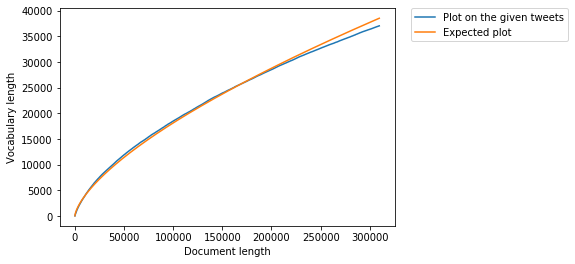

In [10]:
plt.xlabel("Document length")
plt.ylabel("Vocabulary length")

plt.plot(doc_length,voc_length,label="Plot on the given tweets")
plt.plot(doc_length,[k*(i**beta) for i in doc_length],label="Expected plot")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Flattened tokens contains all the tokens that are present in the corpus. WordvsFrequencyDict contains the word to freuency mapping of the corpus.

In [11]:
flattened_all_tokens=[]
for token_list in all_tokens:
    flattened_all_tokens+=token_list
    
frequencyvsword=Counter(flattened_all_tokens).most_common()
wordvsfrequencydict=dict()
for word,frequency in frequencyvsword:
    wordvsfrequencydict[word]=frequency

## Zipf's law for Meaning and Frequency

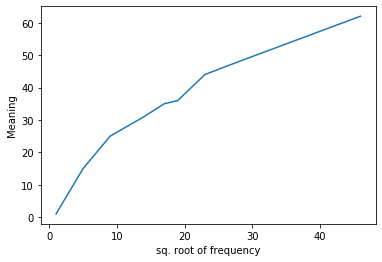

In [12]:
list_of_words_to_be_plotted=["earl","doll","situation","gags","save","visit", "hall","rest","seat","part"]

meaning_list=[]
for word in list_of_words_to_be_plotted:
    a=0
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
                a+=1
    meaning_list.append(a)

frequency_list=[]
for word in list_of_words_to_be_plotted:
    frequency_list.append(wordvsfrequencydict[word])
    
plt.xlabel("sq. root of frequency")
plt.ylabel("Meaning")

frequency=[i for i in frequency_list]
plt.plot(frequency,meaning_list)
plt.show()
    

## Zipf's law for Length and Frequency

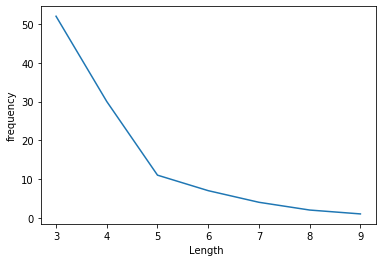

In [13]:
plt.xlabel("Length ")
plt.ylabel("frequency")

list_of_words_to_be_plotted=["barrymore","olympics","awkward","killer","earth","sale","guy"]
frequency=[wordvsfrequencydict[i] for i in list_of_words_to_be_plotted]
length_list=[len(x) for x in list_of_words_to_be_plotted]

plt.plot(length_list,frequency)
plt.show()